In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
from data_load import *

In [2]:
data = load_raw_data()
train = data.loc[data['data_type'] == 'train']
train = train.drop(['data_type'], axis=1)

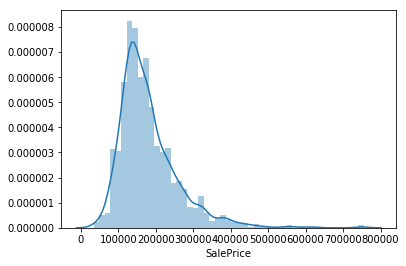

In [3]:
# Density Plot
sns.distplot(train['SalePrice'])

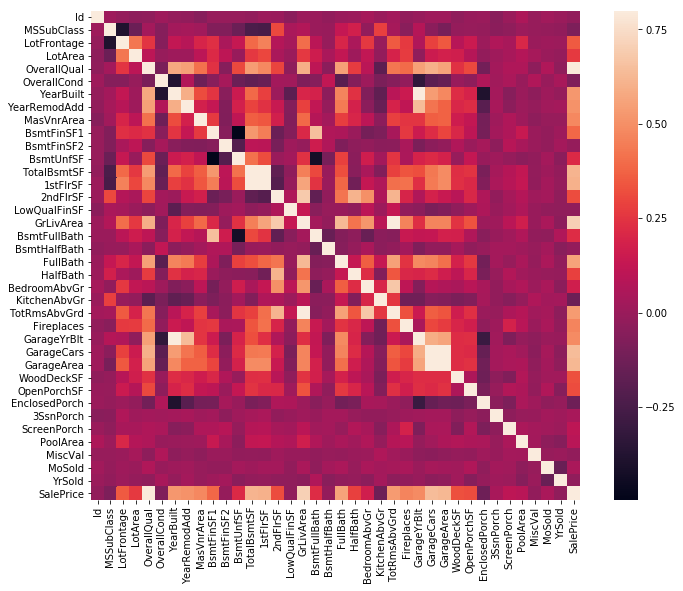

In [7]:
# HeapMap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

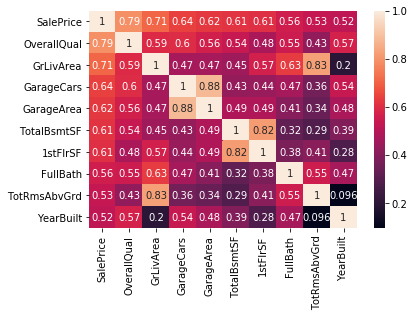

In [8]:
# Top 10 most related matrix
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
hm = sns.heatmap(cm, yticklabels=cols, xticklabels=cols.values, cbar=True, annot=True)

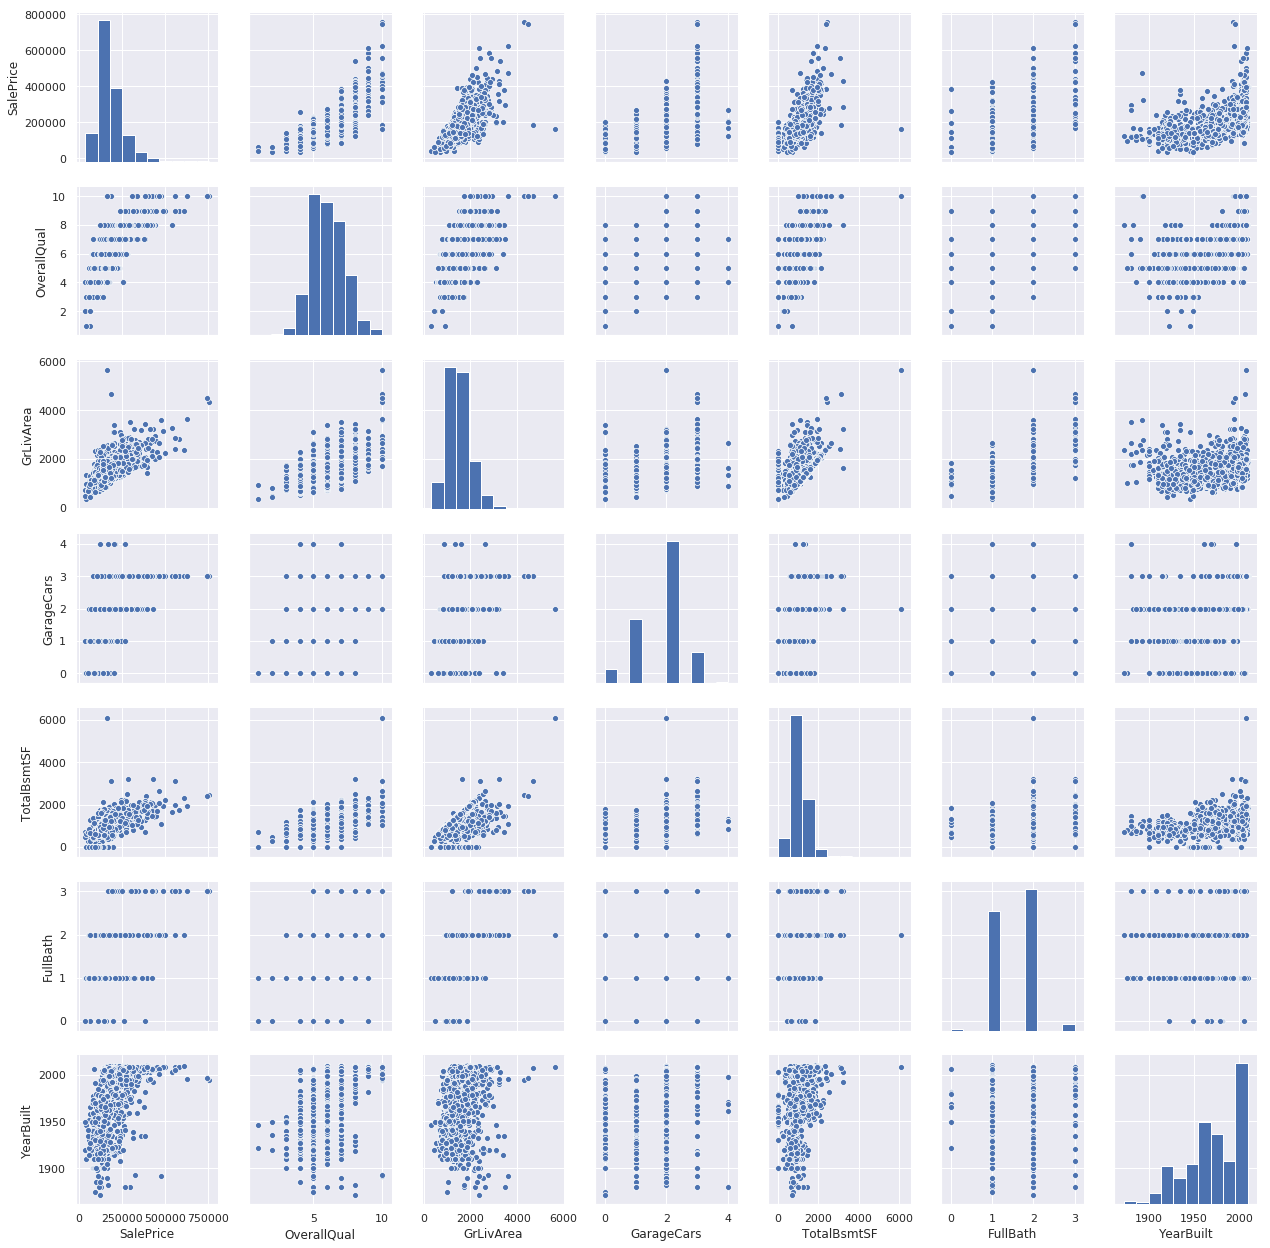

In [23]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height=2.5)
plt.show()

In [5]:
missing_data = train.isnull().sum().sort_values(ascending=False)
missing_ratio = (train.isnull().sum() / train.shape[0]).sort_values(ascending=False)
missing_stat = pd.concat([missing_data, missing_ratio], axis=1, keys=['Freq', 'Count'])
missing_stat.head(20)

,Freq,Count
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


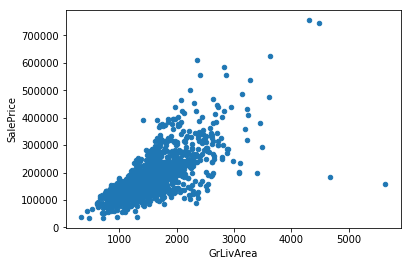

In [9]:
# Missing values, SalePrice vs other features
var = 'GrLivArea'
subdata = pd.concat([train['SalePrice'], train[var]], axis=1)
subdata.plot.scatter(x=var, y='SalePrice')

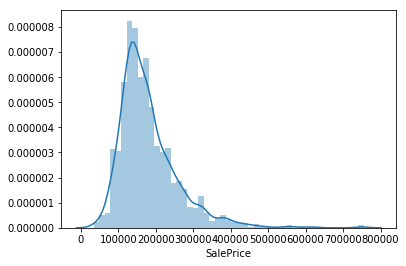

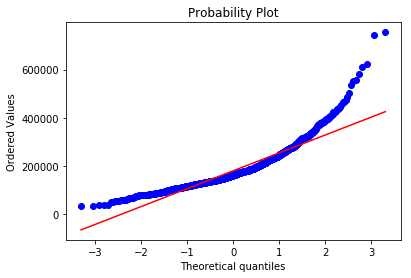

In [23]:
# Now, check the normality of SalePrice
sns.distplot(train['SalePrice'])
fig = plt.figure()
result = scipy.stats.probplot(train['SalePrice'], plot=plt)

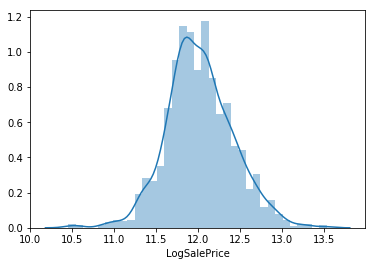

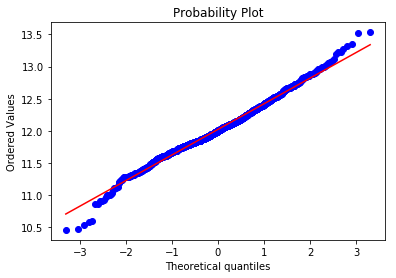

In [29]:
# Apply log transformation to SalePrice
train['LogSalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['LogSalePrice'])
fig = plt.figure()
result = scipy.stats.probplot(train['LogSalePrice'], plot=plt)